In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("50_Startups.csv")

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.shape

(50, 5)

In [6]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
df.drop("State", axis=1, inplace=True)

In [9]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


## Enter Linear Regression

In [15]:
train = df.iloc[:, :3]
test = df.Profit
train[:3]

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54


In [18]:
## apply Linear Regression model
from sklearn.linear_model import LinearRegression

In [19]:
linear_model = LinearRegression()

In [23]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.25)

In [28]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [29]:
linear_prid = linear_model.predict(X_test)

In [30]:
linear_Actual_pridict = pd.DataFrame({'Actual':y_test, 'pridict': linear_prid})

In [31]:
linear_Actual_pridict[:10]

,Actual,pridict
7,155752.60,160641.036694
19,122776.86,115334.925160
36,90708.19,74535.217115
17,125370.37,130295.634936
33,96778.92,97688.671120
22,110352.25,114685.009924
1,191792.06,190280.783112
41,77798.83,74272.279243
6,156122.51,158615.980313
23,108733.99,109993.519773


In [36]:
## Calculating Mean Square Error
mse = np.mean((linear_prid- y_test)**2)

In [38]:
print(f' Mean Square Error is: {mse}')

 Mean Square Error is: 33991050.95336193


In [40]:
r_square = linear_model.score(X_test, y_test)

In [43]:
print(f"R Square value is: {r_square*100}")

R Square value is: 96.7155561709574


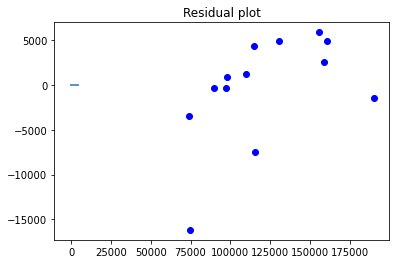

In [69]:
## Selecting the R festure for your Model
x_plot = plt.scatter(linear_prid, (linear_prid - y_test), c='b')
plt.hlines(y=0, xmin = -1000, xmax = 5000)
plt.title('Residual plot')
plt.show()

## Regularization

In [47]:
## Checking the megnitude of cofficient

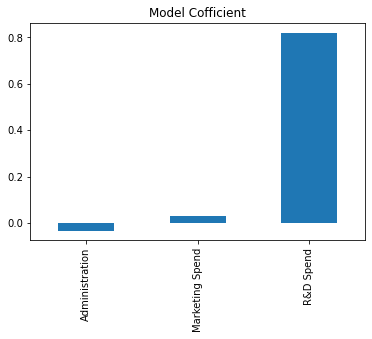

In [48]:
pridictor  = X_train.columns
coef = pd.Series(linear_model.coef_, pridictor).sort_values()
coef.plot(kind= 'bar', title= 'Model Cofficient')
plt.show()

## Ridge Regression

In [49]:
from sklearn.linear_model import Ridge

In [50]:
ridge = Ridge(alpha = 0.5, normalize= True)

In [51]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.5, normalize=True)

In [52]:
ridge_prid = ridge.predict(X_test)

In [53]:
ridge_actual_pridict = pd.DataFrame({"Actual": y_test, 'Pridict': ridge_prid})

In [54]:
ridge_actual_pridict[:10]

,Actual,Pridict
7,155752.60,147897.698026
19,122776.86,98416.885942
36,90708.19,89981.603191
17,125370.37,127975.711371
33,96778.92,102435.819109
22,110352.25,119734.903602
1,191792.06,173802.274508
41,77798.83,84648.400814
6,156122.51,131749.022759
23,108733.99,116313.075121


In [56]:
mse = np.mean((ridge_prid - y_test)**2)

In [57]:
print(f' Mean Square Error = {mse}')

 Mean Square Error = 145410012.84865847


In [58]:
ridge.score(X_test, y_test)

0.8594950712065156

## Lasso Regression

In [59]:
from sklearn.linear_model import Lasso

In [60]:
lasso_model = Lasso(alpha=0.3, normalize= True)

In [61]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.3, normalize=True)

In [62]:
lasso_pridict = lasso_model.predict(X_test)

In [63]:
lasso_actual_pridict = pd.DataFrame({'Actual': y_test, 'Pridict': lasso_pridict})

In [64]:
lasso_actual_pridict[:10]

,Actual,Pridict
7,155752.60,160642.344990
19,122776.86,115345.562965
36,90708.19,74532.271256
17,125370.37,130295.633525
33,96778.92,97686.384374
22,110352.25,114681.603049
1,191792.06,190280.300806
41,77798.83,74268.937359
6,156122.51,158625.315177
23,108733.99,109988.826358


In [65]:
lasso_model.score(X_train, y_train)

0.9458836034353607

In [66]:
lasso_model.score(X_test, y_test)

0.9671573742529913